In [1]:
pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression

In [3]:
natgas_df =pd.read_csv('Nat_Gas.csv')
natgas_df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


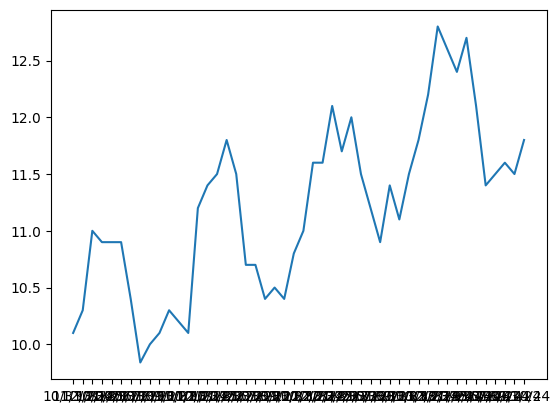

In [4]:
plt.plot(natgas_df['Dates'],natgas_df['Prices'])

In [5]:
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])

natgas_df['Year'] = natgas_df['Dates'].dt.year
natgas_df['Month'] = natgas_df['Dates'].dt.month

natgas_jan=natgas_df[natgas_df['Month'] == 1]
natgas_jan


<ipython-input-5-8efe3d56ae2f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])


,Dates,Prices,Year,Month
3,2021-01-31,10.9,2021,1
15,2022-01-31,11.5,2022,1
27,2023-01-31,12.1,2023,1
39,2024-01-31,12.6,2024,1


Using SARIMA - Seasonal Autoregressive Intergrated Moving Average

In [6]:
nat_gas_df = pd.read_csv("Nat_Gas.csv")

In [7]:
nat_gas_df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
# Convert Month into Datetime
nat_gas_df['Dates']=pd.to_datetime(nat_gas_df['Dates'])
nat_gas_df

<ipython-input-9-32142e305437>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas_df['Dates']=pd.to_datetime(nat_gas_df['Dates'])


,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


In [10]:
nat_gas_df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [11]:
nat_gas_df.set_index('Dates',inplace=True)

In [12]:
nat_gas_df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


<Axes: xlabel='Dates'>

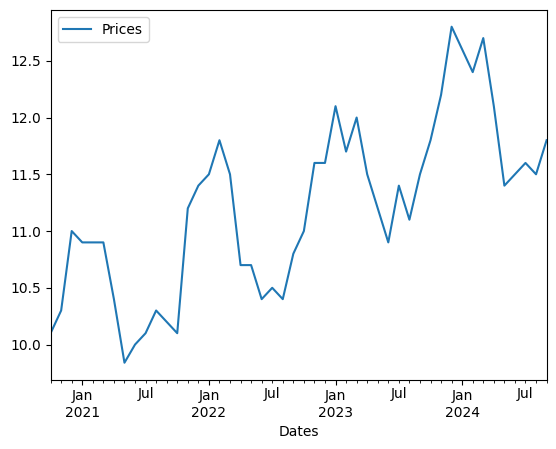

In [13]:
nat_gas_df.plot()

In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(nat_gas_df['Prices'])

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Prices):
    result=adfuller(Prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [17]:
adfuller_test(nat_gas_df['Prices'])

ADF Test Statistic : 0.21807686169999427
p-value : 0.973257438844869
#Lags Used : 10
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
!pip install pmdarima==2.0.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00


In [19]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [20]:
#Let's run auto_arima() function to get best p,d,q,P,D,Q values

pm.auto_arima(nat_gas_df['Prices'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4,
               trace=True,error_action='ignore', suppress_warnings=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.147, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.40 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=4.12 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.069, Time=11.64 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.330, Time=10.40 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.109, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=1.88 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=1.35 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -12.055
Date:                Tue, 13 Aug 2024   AIC                             36.109
Time:                        15:15:42   BIC                             47.210
Sample:                    10-31-2020   HQIC                            40.287
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.008      1.276      0.202      -0.005       0.025
ar.L1          1.6926      0.050     33.525      0.000       1.594       1.792
ar.L2         -0.9590      0.048    -19.946      0.000      -1.053      -0.865
ma.L1         -1.8031      0.277     -6.501      0.000      -2.347      -1.260
ma.L2          0.9498      0.307      3.094      0.002       0.348       1.552
sigma2         0.0896      0.030      3.003      0.003       0.031       0.148
===================================================================================
Ljung-Box (L1) (Q):                   6.30   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.01   Prob(JB):                         0.31
Heteroskedasticity (H):               0.86   Skew:                             0.51
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Let's split the data into train and test set

train_data = nat_gas_df[:len(nat_gas_df)-12]
test_data = nat_gas_df[len(nat_gas_df)-12:]

In [22]:
arima_model = SARIMAX(train_data['Prices'], order = (2,1,2), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   0.168
Date:                              Tue, 13 Aug 2024   AIC                             13.664
Time:                                      15:15:45   BIC                             21.612
Sample:                                  10-31-2020   HQIC                            15.663
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0966    174.505     -0.006      0.995    -343.119     340.926
ar.L2         -0.0968     17.037     -0.006      0.995     -33.488      33.295
ma.L1         -0.2542   2038.124     -0.000      1.000   -3994.904    3994.395
ma.L2         -0.7457   1519.857     -0.000      1.000   -2979.611    2978.119
ar.S.L12      -0.6443      0.742     -0.869      0.385      -2.098       0.809
ma.S.L12      -0.9986   2743.759     -0.000      1.000   -5378.668    5376.671
sigma2         0.0156     51.605      0.000      1.000    -101.129     101.160
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
arima_pred = arima_result.predict(start = len(train_data), end = len(nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,ARIMA Predictions
2023-10-31,11.123726
2023-11-30,12.293481
2023-12-31,12.406998
2024-01-31,12.668372
2024-02-29,12.660525
2024-03-31,12.666545
2024-04-30,11.678595
2024-05-31,11.728106
2024-06-30,11.412530
2024-07-31,11.637279


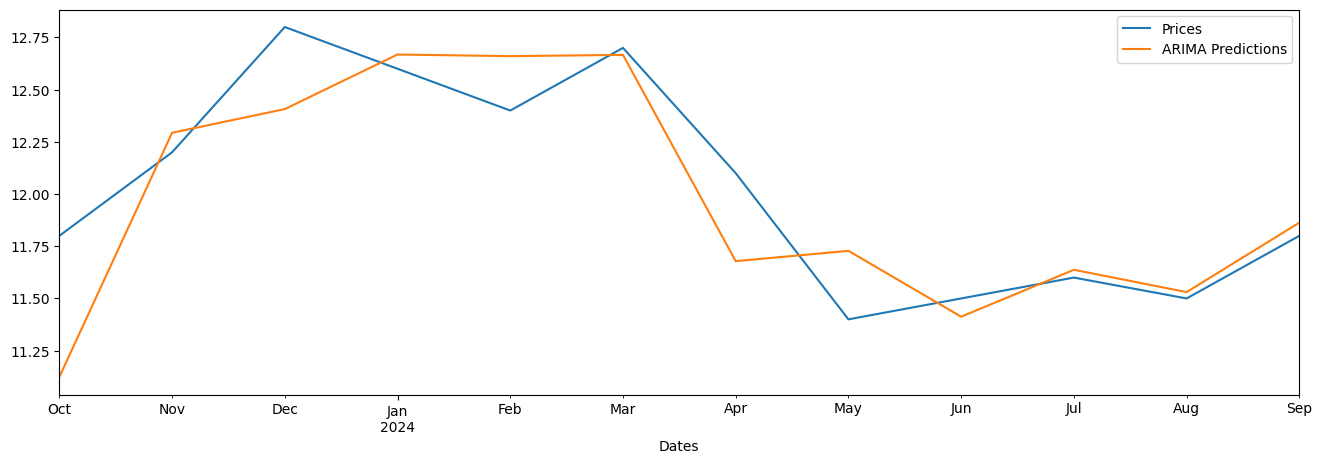

In [24]:
test_data['Prices'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

<Axes: xlabel='Dates'>

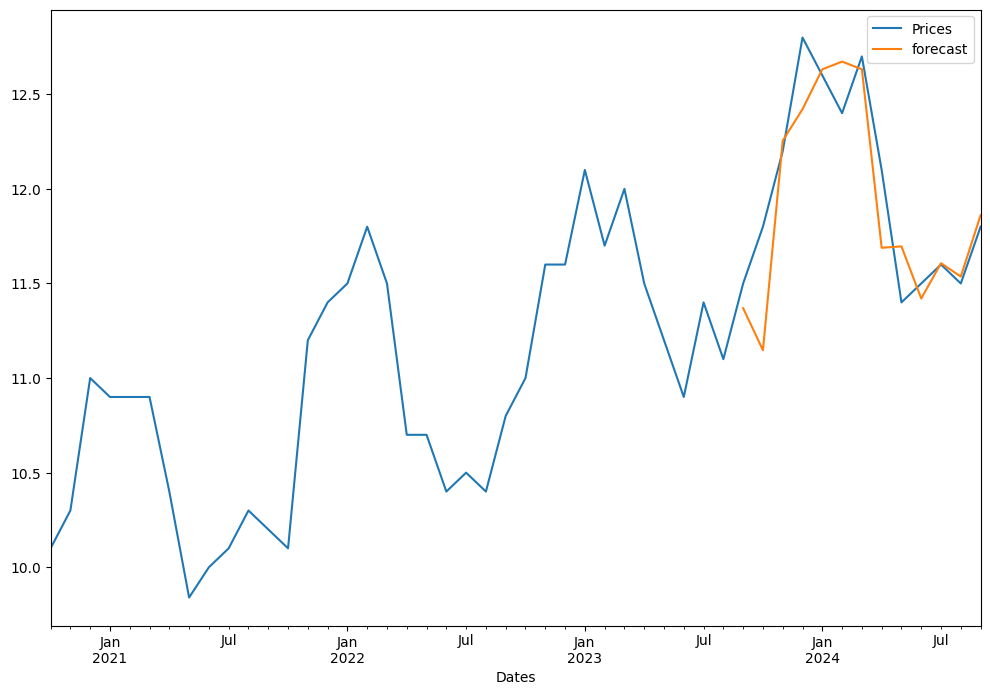

In [25]:
nat_gas_df['forecast']=arima_result.predict(start=35,end=47,dynamic=True)
nat_gas_df[['Prices','forecast']].plot(figsize=(12,8))

In [26]:
nat_gas_df.tail(12)

,Prices,forecast
Dates,,
2023-10-31,11.8,11.147138
2023-11-30,12.2,12.254501
2023-12-31,12.8,12.421252
2024-01-31,12.6,12.632132
2024-02-29,12.4,12.672660
2024-03-31,12.7,12.632363
2024-04-30,12.1,11.688678
2024-05-31,11.4,11.695976
2024-06-30,11.5,11.420561


In [27]:
test_data['ARIMA_Predictions'] = arima_pred

<ipython-input-27-c6fe8541f169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [28]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [29]:
arima_rmse_error = rmse(test_data['Prices'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = nat_gas_df['Prices'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.08278202717733533
RMSE Error: 0.28771865976563865
Mean: 11.207083333333332


In [30]:
arima_pred_full = arima_result.predict(start = 0, end = len(nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [31]:
input_date = '2024-08-31'
arima_pred_full.loc[input_date]

11.530545208350398

In [32]:
nat_gas_df.loc[input_date]['Prices']

11.5

## Forecasting using Prophet

In [33]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [34]:
#read in the data
df = pd.read_csv('Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [35]:
#Select the date and the price
df = df[['Dates', 'Prices']]
#Rename the features:
df = df.rename(columns={'Dates':'ds', 'Prices':'y'})
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [36]:
# Get last 12 rows of data and store them into a new variable
last = df[len(df)-12:]
last

,ds,y
36,10/31/23,11.8
37,11/30/23,12.2
38,12/31/23,12.8
39,1/31/24,12.6
40,2/29/24,12.4
41,3/31/24,12.7
42,4/30/24,12.1
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6


In [37]:
#Get all rows except the last 12
df = df[:-12]
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [38]:
#Creating Prophet Object (Model)
fbp = Prophet(seasonality_mode='multiplicative', mcmc_samples=360)

#Train the model
fbp.fit(df)
future = fbp.make_future_dataframe(periods=24, freq='M')
forecast = fbp.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuigi0

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=53994', 'data', 'file=/tmp/tmpsuigi0ue/buzxq_tf.json', 'init=/tmp/tmpsuigi0ue/u8u7yd0v.json', 'output', 'file=/tmp/tmpsuigi0ue/prophet_model8nkw6yib/prophet_model-20240813152402_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=53994', 'data', 'file=/tmp/tmpsuigi0ue/buzxq_tf.json', 'init=/tmp/tmpsuigi0ue/u8u7yd0v.json', 'output', 'file=/tmp/tmpsuigi0ue/prophet_model8nkw6yib/prophet_model-20240813152402_2.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:24:12 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=53994', 'data', 'file=/tmp/tmpsuigi0ue/buzxq_tf.json', 'init=/tmp/tmpsuigi0ue/u8u7yd0v.json', 'output', 'file=/tmp/tmpsuigi0ue/prophet_model8nkw6yib/prophet_model-20240813152402_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsuigi0ue/prophet_model8nkw6yib/prophet_model-20240813152402_1.csv
 console_msgs (if any):
	/tmp/tmpsuigi0ue/prophet_model8nkw6yib/prophet_model-20240813152402_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 180
    num_warmup = 180
    save_warmup = 0 (Default)
    thin = 1 (Defau

In [39]:
#plot the data
plot_plotly(fbp, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [40]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
45,2024-07-31,12.540627,11.118216,12.639165,11.904289,13.189381,-0.053130,-0.088100,-0.015538,-0.053130,-0.088100,-0.015538,0.0,0.0,0.0,11.874348
46,2024-08-31,12.610323,11.558180,13.290998,11.895991,13.339226,-0.015600,-0.051990,0.021474,-0.015600,-0.051990,0.021474,0.0,0.0,0.0,12.413601
47,2024-09-30,12.677771,11.165690,13.041510,11.885191,13.469033,-0.044218,-0.081496,-0.010164,-0.044218,-0.081496,-0.010164,0.0,0.0,0.0,12.117180
48,2024-10-31,12.747467,11.487570,13.283434,11.880733,13.601674,-0.028164,-0.054071,-0.002300,-0.028164,-0.054071,-0.002300,0.0,0.0,0.0,12.388452
49,2024-11-30,12.814914,11.916619,13.904133,11.867188,13.748278,0.008887,-0.013825,0.030441,0.008887,-0.013825,0.030441,0.0,0.0,0.0,12.928796
50,2024-12-31,12.884610,12.682726,14.924256,11.868907,13.877828,0.069747,0.043497,0.096451,0.069747,0.043497,0.096451,0.0,0.0,0.0,13.783278
51,2025-01-31,12.954306,12.436760,14.831076,11.857081,14.036608,0.052847,0.024850,0.080939,0.052847,0.024850,0.080939,0.0,0.0,0.0,13.638907
52,2025-02-28,13.017257,12.546481,15.136514,11.877394,14.179895,0.062298,0.043297,0.081532,0.062298,0.043297,0.081532,0.0,0.0,0.0,13.828208
53,2025-03-31,13.086953,12.407910,15.104365,11.848807,14.341502,0.048463,0.023558,0.071683,0.048463,0.023558,0.071683,0.0,0.0,0.0,13.721181
54,2025-04-30,13.154401,11.647420,14.381553,11.826981,14.475682,-0.011723,-0.033437,0.011753,-0.011723,-0.033437,0.011753,0.0,0.0,0.0,13.000194


In [47]:
#Show the models prediction for 8/31/24
forecast[forecast.ds == '8/31/24']['yhat']

,yhat
46,12.413601


In [48]:
#Actual price for 8/31/24
last[last.ds == '8/31/24']['y']

,y
46,11.5


In [49]:
future = fbp.make_future_dataframe(periods=120, freq='MS')
forecast = fbp.predict(future)

#enter Month and year in following format 'mm/01/yy' -- KEEP day @ '01' AND THEN Run the ENTIRE code
#example : userdate = 01/01/24
userdate = '01/01/24'
forecast[forecast.ds == userdate]['yhat']

,yhat
39,13.117248


In [50]:
#Actual price for user date
last[last.ds == '1/31/24']['y']

,y
39,12.6


In [51]:
forecast[forecast.ds == userdate].index.values

array([39])

In [52]:
# Forecast of Price next 12 months
T = forecast[forecast.ds == userdate].index.values +12
forecast.iloc[T]['yhat']

,yhat
51,14.673263
